In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, text='ABCDE', org=(50, 300), fontFace=font, fontScale=5, color=(255,255,255), thickness=30)
    return img

In [3]:
def disp_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

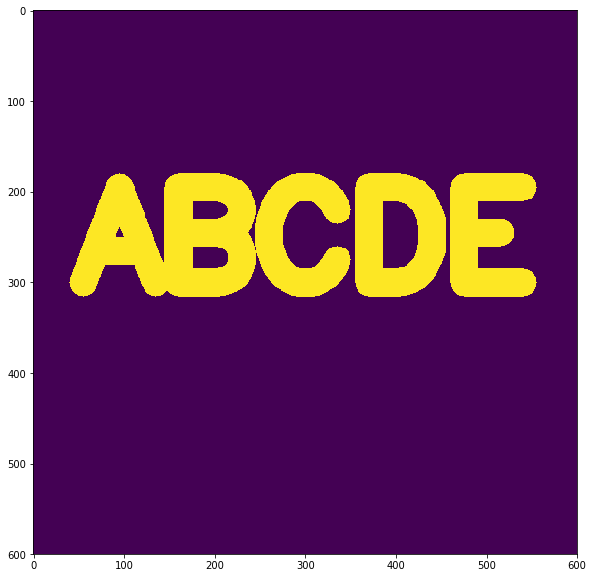

In [4]:
img = load_img()
disp_img(img)

In [5]:
kernel = np.ones((5,5), dtype=np.uint8)

In [6]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

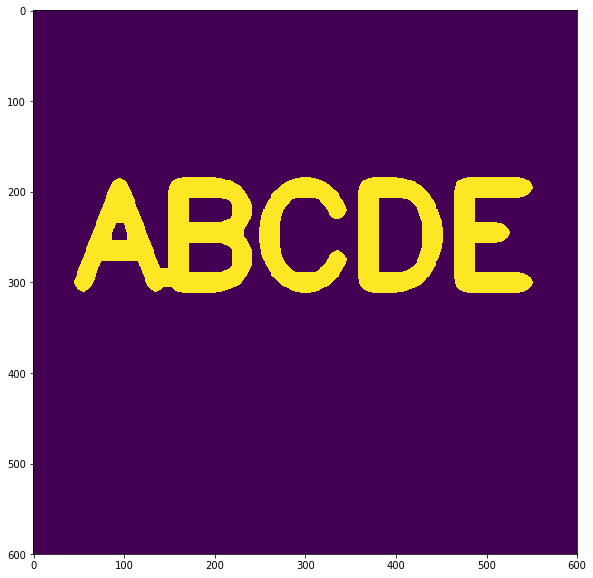

In [7]:
res = cv2.erode(img, kernel, iterations=2)
disp_img(res)

In [8]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))
white_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

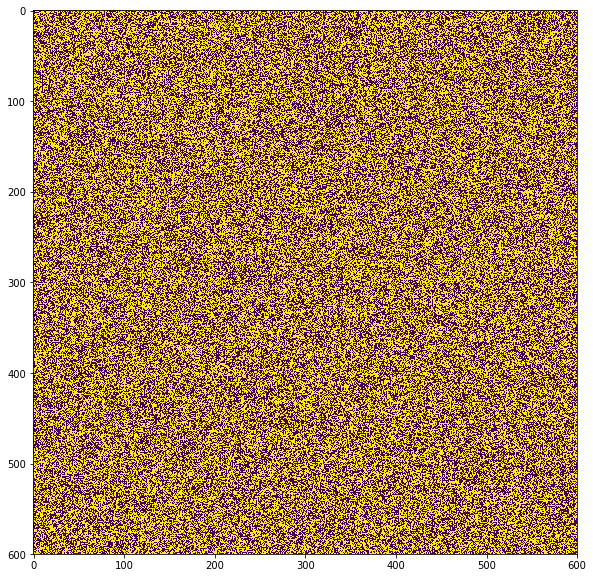

In [9]:
disp_img(white_noise)

In [10]:
img.max()

255.0

In [11]:
white_noise *= 255

In [12]:
white_noise

array([[  0,   0,   0, ...,   0, 255,   0],
       [255,   0, 255, ...,   0, 255, 255],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ..., 255,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0, 255]])

In [13]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

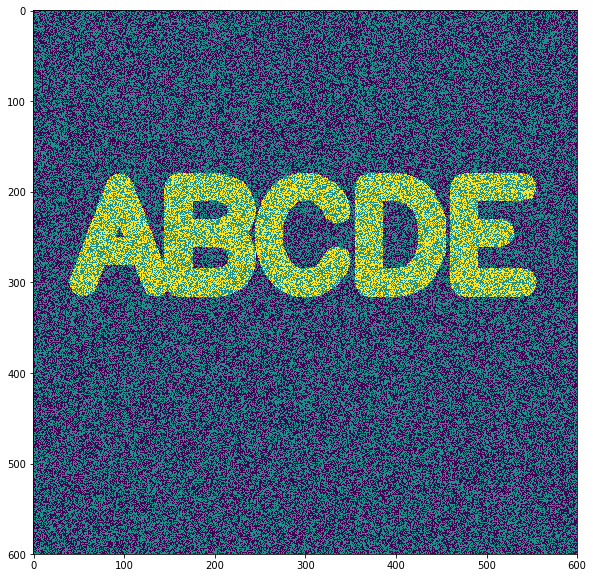

In [14]:
noise_img = white_noise + img
disp_img(noise_img)

In [15]:
noise_img

array([[  0.,   0.,   0., ...,   0., 255.,   0.],
       [255.,   0., 255., ...,   0., 255., 255.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255.,   0.,   0., ..., 255.,   0.,   0.],
       [255., 255.,   0., ...,   0.,   0.,   0.],
       [  0., 255., 255., ...,   0.,   0., 255.]])

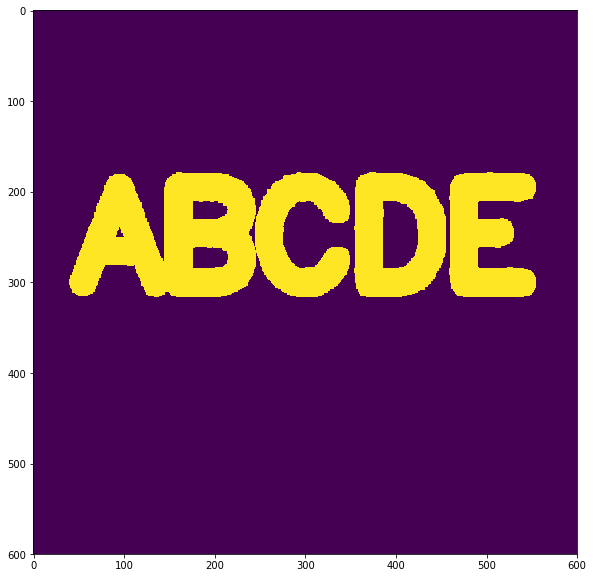

In [16]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
disp_img(opening)

In [17]:
black_noise = np.random.randint(0, 2, (600,600))
black_noise

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 1, 0]])

In [18]:
black_noise *= -255
black_noise

array([[   0, -255,    0, ...,    0,    0, -255],
       [   0,    0, -255, ..., -255, -255,    0],
       [-255, -255, -255, ...,    0, -255,    0],
       ...,
       [-255, -255,    0, ...,    0,    0, -255],
       [-255, -255, -255, ..., -255,    0, -255],
       [   0, -255, -255, ..., -255, -255,    0]])

In [19]:
black_noise_img = img + black_noise
black_noise_img

array([[   0., -255.,    0., ...,    0.,    0., -255.],
       [   0.,    0., -255., ..., -255., -255.,    0.],
       [-255., -255., -255., ...,    0., -255.,    0.],
       ...,
       [-255., -255.,    0., ...,    0.,    0., -255.],
       [-255., -255., -255., ..., -255.,    0., -255.],
       [   0., -255., -255., ..., -255., -255.,    0.]])

In [20]:
black_noise_img[black_noise_img == -255] = 0

In [21]:
black_noise_img.min()

0.0

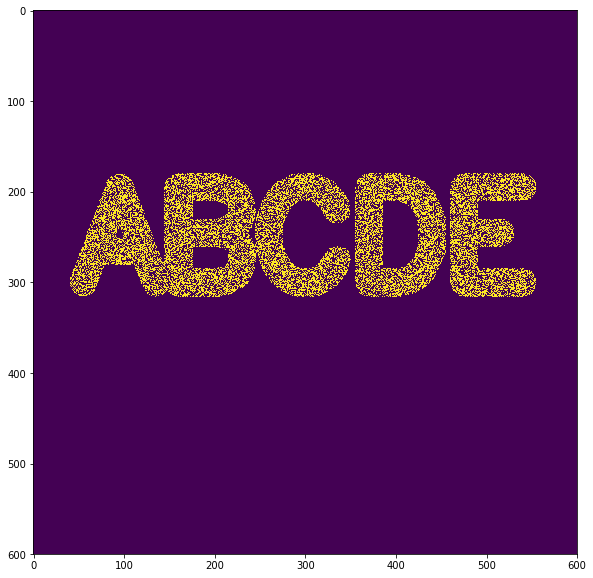

In [22]:
disp_img(black_noise_img)

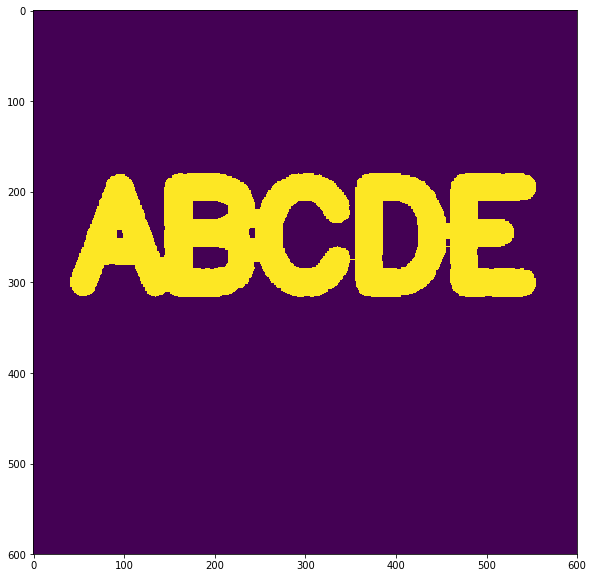

In [23]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
disp_img(closing)

In [24]:
img = load_img()

In [25]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

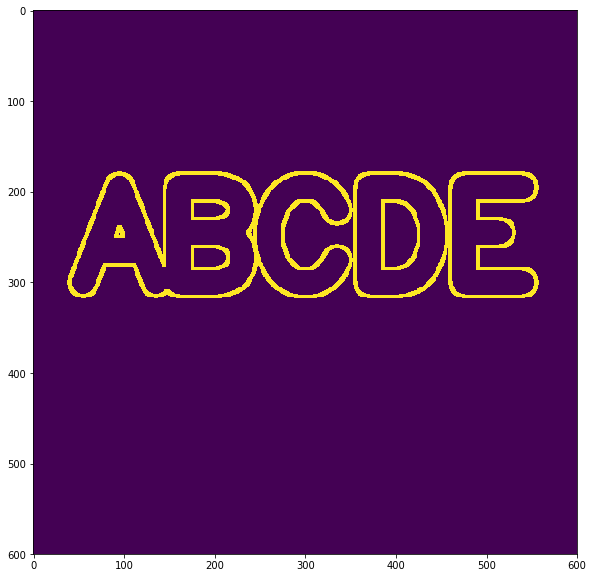

In [26]:
disp_img(gradient)